<a href="https://colab.research.google.com/github/sumedhvdatar/Datastructures/blob/master/Assignment3_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name.

In [0]:
NAME = "Sumedh Vilas Datar"

---

# Assignment Description
The purpose of this assignment is to gain some experience with multilayer and convolutional networks.
This assignment will be fairly open-ended, but I will give some general guidelines.

# Part 1 - Fully Connected Feed Forward Networks
Train a feedforward networks in python to perform a task of your choice. If you don't have anything in mind, you can do classification of some common datasets (MNIST, Fashion MNIST). You may find it interesting to use other datasets (faces, etc).

Please don't do anything simpler than this, unless it's interesting (a problem in your research, from your work, using a unique dataset).

You may use libraries for this assignment (tensorflow, keras, sklearn, etc). Please don't use other neural network libraries (pytorch, etc).

You may re-use code from previous assignment. You may follow some tutorial, but please some unique contribution (use a different dataset, for example).

# 1A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below. Please use only a single cell.

You may do this however you wish, but should follow the practices we learned in class (shuffling data, normalizing, etc).

If you want to experiment with some feature transformations, I would encourage it (just be careful of generating too many features).

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


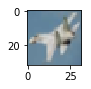

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(x_test[10],interpolation='nearest')
plt.show()

# 1B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


# 1C - Training
Train a single fully connected network for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.9238 - acc: 0.3009 - val_loss: 1.8475 - val_acc: 0.3310
Epoch 2/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.7830 - acc: 0.3585 - val_loss: 1.7357 - val_acc: 0.3729
Epoch 3/100
50000/50000 [==============================] - 6s 125us/step - loss: 1.7246 - acc: 0.3820 - val_loss: 1.7131 - val_acc: 0.3769
Epoch 4/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.6812 - acc: 0.3979 - val_loss: 1.6582 - val_acc: 0.4084
Epoch 5/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.6451 - acc: 0.4106 - val_loss: 1.6885 - val_acc: 0.3875
Epoch 6/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.6238 - acc: 0.4195 - val_loss: 1.6129 - val_acc: 0.4234
Epoch 7/100
50000/50000 [==============================] - 6s 123us/

# 1D - Quantitative Evaluation
Do some quantitative evaluation of your trained model. At minimum you should report the accuracy on some withheld data. Plots would be preferable.

In [7]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 54us/step
Test loss: 1.6043680820465087
Test accuracy: 0.4787


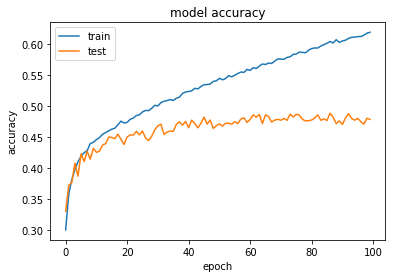

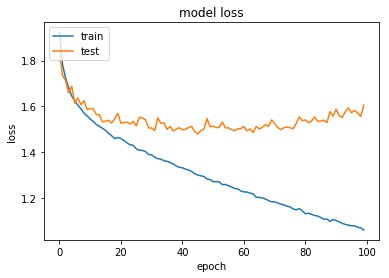

In [8]:
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1E - Qualitative Evaluation
Do some qualitative evaluation of your trained model. 

An example would be visualizing a small sample (10 or so) of images that were correctly classified from your validation data, and another sample of incorrectly classified samples.

TypeError: ignored

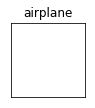

In [6]:
import numpy as np
import matplotlib.pyplot as plt
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck

In [0]:
y

In [0]:
import numpy as np
np.argmax(y)

# 1F - Report
Write a few sentence summary of your work on part 1. It should answer the following questions:

1. What task were you trying to solve?
2. How did you implement it?
3. How did it perform? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

YOUR ANSWER HERE

---------------------------------------------

# Part 2 - Advanced architectures (CNN/RNN)
In part 2 train an advanced architecture like a CNN to perform the same task from part 1. Please assume part 1 and 2 are run independently. So you may need to repeat code twice.

You do not need to do anything super fancy (don't try to train a 50 layer residual network, etc).

# 2A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

# 2B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

# 2C - Training
Train a more advanced (CNN/RNN) for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

# 2D - Quantitative Evaluation
Re-do the quantiative evaluation from part 1 using this more advanced model.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

# 2E - Qualitative Evaluation
Re-do the qualitative evaluation from part 1 using this more advanced model.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

# 2F - Report
Write a few sentence summary of your work on part 2. Focus on the differences from part 1.

The summary should at least answer the following questions:
1. What task were you trying to solve?
2. How did you implement it.
3. How did it perform? Can you interpret the performance metrics in plain english? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

You can do some basic formatting with markdown if you'd like.


YOUR ANSWER HERE